# Phase 3 - Unsupervised Learning Algorithm
For the third phase of our project, we will use unsupervised learning algorithms to make conclusions about our data. Unsupervised learning algorithms are different from supervised learning algorithms b thes make conclusions based on unlabelled data by finding hidden patterns and insights from the given data. For this phase of our project, we will evaluate the same dataset we used in Phase 2 but this time using a popular unsupervised learning algorithm: K-means clustering. We will apply determine the most optimal range of K(clusters) then use three different sizes of K and evaluate each one and determine the most optimal K for our dataset. 


## K-means Clustering
K-means clustering is one of the most popular unsupervised learning algorithms. It's a simple algorithm that groups (or clusters) our unlabelled data based on similarities it discovered in the data. The goal of our project is to choose three different sizes of K, and evaluate each one. We then want to compare the results of the evaluations between all three Ks and determine the best one.

<b>Note:</b> Because we want to stay consistent with the last phase of our project, we will be importing the same dataset and using the same features we did in the last phase (we explained why we chose the three features in the last phase).


### Importing the dataset
We will import the same dataset as the previous phase and read it using the read.csv() method from the panda library. We will then add the features that we will be assessing to the objects 'features_dataset' and 'x'. We created two objects for the features of the dataset. The 'features_dataset' object is what we will using to evaluate the data. It will be unedited and only have the three features. The 'x' object will be used for visualization. We will add the results of the KMeans clustering of each size of K into it. This will help us when plotting the graph. 

<b>Note:</b> The reason we used two separate objects for the dataset may not make much sense now, but it will be clear why we used two objects as you read on.


In [147]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#Importing and reading the dataset
dataset = pd.read_csv("FastfoodDatasetWithTV.csv")

#Similarly to phase 2, we will be using the following three features to determine the clustering.
features = ['calories', 'total_fat', 'sugar']

#Feature columns dataset #1
features_dataset = dataset[features]

#Features columns dataset #2
x = dataset[features]

### Elbow Curve Method
Determining the optimal number of clusters can be difficult. However, we have many different methods that can help us. For our project, we will be using the Elbow Curve method. The elbow method consists of iterating through a range of clusters, determining their total sum of squared error, and then plotting it. The resulting graph will be a curve and the optimal number of clusters will be at the base of the curve where the line starts to straighten out, or the 'elbow' of the curve.


#### Calculating the values
To implement this, we will create a for loop the will iterate 10 times (we chose the number 10 as it is unlikely that we will need more than 10 clusters). In each iteration of the loop will use the KMeans() method create the clusters. We will add the following parameter (init = KMeasn++) in order to ensure that there is a good amount of distance between each cluster when picking the points. This helps us ensure that the clusters created will be good/correct. Finally, we will calculate the sum of squared error for each iteration and add them into an empty array we created.


In [148]:
#Creating an empty array to store the values of the Sum of Squared Error for each cluster.
sse = []

#Setting the range
k_range = range(1,10)

#To iterate from 1 to 10 to create 1 to 10 clusters.
for k in k_range:
    
    #Applying the KMeans method.
    km_test = KMeans(n_clusters=k, init='k-means++', n_init = 10)
    km_test.fit(features_dataset)
    
    #Append the total sum of squard error of each cluster to the array we created.
    sse.append(km_test.inertia_)

#### Plotting the graph
We will then plot the array we created. We will create a graph plot with the sum of squared error on the X-axis and the number of clusters on the Y-axis. After plotting our points, we found that the graph starts to straighten out between the values 2 to 4. Therefore, we will choose these values to evaluate.

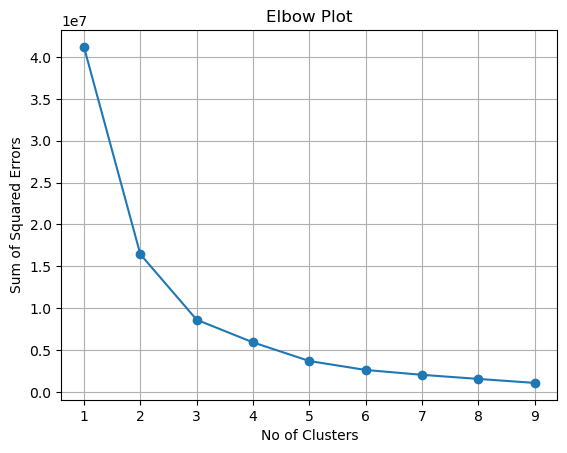

In [149]:
#Plotting the elbow method 
plt.title("Elbow Plot")
plt.xlabel('No of Clusters')
plt.ylabel('Sum of Squared Errors')
plt.grid(True)
plt.plot(k_range,sse, 'o-')

### Transforming the values
Before we start evaluating, we felt it would be best to scale the values of our data into something smaller. This will make evaluating our data and plotting it easier. We will use the MinMaxScaler object from the 'sklearn' library to do so. It will scale and translate each feature individually such that it is between the given range of 0 and 1. This will make our data smaller and easier to work with and compare since we will not have to work with incredibly big numbers.

<b>Note:</b> Because we have scaled down our data to a range between 0 to 1, we will not be rounding any of our number as not to impact the values.

In [150]:
#Importing the method
from sklearn.preprocessing import MinMaxScaler

#Create a object of MinMaxScaler(), then transform our data and re-insert the new data in place of the old data.
scaler = MinMaxScaler()
features_dataset = scaler.fit_transform(features_dataset)
features_dataset = pd.DataFrame(features_dataset, columns = features)

#We will do the same steps to the second dataset as we did to the first.
x = scaler.fit_transform(x)
x = pd.DataFrame(features_dataset, columns = features)

#Print the data
features_dataset

,calories,total_fat,sugar
0,0.149378,0.049645,0.126437
1,0.340249,0.319149,0.206897
2,0.460581,0.475177,0.206897
3,0.302905,0.219858,0.206897
4,0.373444,0.319149,0.206897
...,...,...,...
510,0.315353,0.269504,0.091954
511,0.232365,0.205674,0.080460
512,0.315353,0.297872,0.080460
513,0.290456,0.248227,0.091954


## Comparing the clusters
Based on the previous plot, (2,3,4) seem to be the best range of clusters since there at the 'elbow'/curve section of the graph. Therefor we will be evaluating each one of them and comparing to determine the best one. We will then calculate the total within-cluster sum of squared error and the silhouette coefficient for each one and visualize the clustering using a 3D graph.


## 2 Clusters

### Creating the clusters
We will use the KMeans() method we used previously to create the clusters. Then to help us with evaluating the data, we will add the label of each point in the dataset using the .labels_ method. The .labels_ will return the label for each point, which is the number of the cluster the point is present in. As we have only 2 clusters, the values will be 0 or 1. 0 for first cluster and 1 for the second cluster. After adding it to our features dataset under the column 'KMeans-2Clusters', we will then print the dataset.

In [151]:
#Applying KMeans clustering with 2 clusters
km_cl2 = KMeans(n_clusters = 2, init='k-means++', n_init = 10)
km_cl2.fit(features_dataset)

#Add a new column named KMeans-2Clusters to X dataset that has the current label of the value.
x['KMeans-2Clusters'] = km_cl2.labels_

#Printing the X dataset with the new column.
x

,calories,total_fat,sugar,KMeans-2Clusters
0,0.149378,0.049645,0.126437,0
1,0.340249,0.319149,0.206897,1
2,0.460581,0.475177,0.206897,1
3,0.302905,0.219858,0.206897,1
4,0.373444,0.319149,0.206897,1
...,...,...,...,...
510,0.315353,0.269504,0.091954,1
511,0.232365,0.205674,0.080460,0
512,0.315353,0.297872,0.080460,1
513,0.290456,0.248227,0.091954,1


### Evaluation
Now we will evaluate the clusters using the the silhouette coefficient. Firstly, we will also print the values of the cluster centres. Then, we will use the method silhouette_score from the 'sklearn' library to calculate the silhouette coefficient. We will use the default metric for measuring the distance, which is set as 'euclidean’. After that, we will use the .interia_ method in the KMeans object to calculate the total within-cluster sum of squared error. Then, we will then print the results.


In [152]:
#Importing the methods
from sklearn.metrics import silhouette_score

print('Evaluation of 2 clusters: \n')

#Printing the X,Y,Z Coordinates of the cluster centers
print('Cluster centers: \n', km_cl2.cluster_centers_ , '\n')

#Printing the total within-cluster sum of squared error.
print('Intra-cluster variance: \n', km_cl2.inertia_, '\n')

#Printing the silhouette coefficient.
sc_cl2 = silhouette_score(features_dataset, km_cl2.labels_)
print('Silhouette Coefficient: \n', sc_cl2, '\n')

Evaluation of 2 clusters: 

Cluster centers: 
 [[0.15580685 0.12586704 0.06397625]
 [0.34744854 0.33976798 0.13047119]] 

Intra-cluster variance: 
 9.653406027910673 

Silhouette Coefficient: 
 0.49890244571096715 



### BCubed Precision and Recall
The BCubed Precision and Recall is another way to evaluate the clusters. It is an extrinsic method, as it evaluates the
precision and recall for every object in a clustering according to a ground truth. The ground truth here would be the class label, or the target variable we defined in the last phase: the 'Category' column. However, the 'Category' column is composed of strings. Therefore, we will add a new column named 'Category_Num' that will transform the string into an integer based on its value. The healthy/good values will be transformed to 0, while the unhealthy/bad values will be transformed to 1. Firstly, we will prin the amount of correctly labeled values for more information. Then, we will then calculate and print the precision and recall values for the healthy values found in the first cluster.

<b>Note:</b> The BCubed Precision and Recall requires a ground truth, or a base set to compare the values of the clustering to. As we are using the same dataset we used in the previous phase, our class label only has 2 values. Therefore, we can only use it to compare and calculate the precision and recall for K=2 clusters. So for the third phase of our project, we will only be using the BCubed Recall and Precision on 2 Clusters, and the final evaluation between all three values of K will depend on the silhouette coefficient and the total within-cluster sum of squared error.


In [153]:
#Caluculate the total number of correctly labeled points.
correctly_labeled = sum(actual_y == clustered_y)
print("Number of correctly labelled points:", correctly_labeled, " points \n" )

#We will add the Category_Num value to X in order to compare.
x['Category_Num'] = dataset['Category_Num']
     
#Measuring the healthy values found in cluster 1

#Iterate through the rows of X
for rowIndex, row in x.iterrows(): 
    
    #Iterate through the columns of X
    for columnIndex, value in row.items():
        
        #If the category number = 0 and the KMeans-2Clusters = 0, it will increment the same_cat_in_cluster value.
        if(columnIndex == "Category_Num"): 
            if(value == 0):
                    for columnIndex, value in row.items():
                        if(columnIndex == "KMeans-2Clusters"):
                            if(value == 0):
                                same_cat_in_cluster = same_cat_in_cluster + 1
                    

                
#Measuring the total number of points in the first cluster.
no_in_cluster = sum(x['KMeans-2Clusters'] == 0)

#Measuring the total healthy in all clusters.
no_in_category = sum(x['Category_Num'] == 0)

#Calculating and printing the BCubed recall and precision.
print("BCubed Precision: ", (same_cat_in_cluster/no_in_cluster), "\n")
print("BCubed Recall", (same_cat_in_cluster/no_in_category))

#We will drop the Category_Num value from X as we no longer need it.
x.drop(['Category_Num'], axis=1)

Number of correctly labelled points: 488  points 

BCubed Precision:  2.84297520661157 

BCubed Recall 2.9318181818181817


,calories,total_fat,sugar,KMeans-2Clusters
0,0.149378,0.049645,0.126437,0
1,0.340249,0.319149,0.206897,1
2,0.460581,0.475177,0.206897,1
3,0.302905,0.219858,0.206897,1
4,0.373444,0.319149,0.206897,1
...,...,...,...,...
510,0.315353,0.269504,0.091954,1
511,0.232365,0.205674,0.080460,0
512,0.315353,0.297872,0.080460,1
513,0.290456,0.248227,0.091954,1


### Visualization
After calculating and evaluating the clusters, we will now visualize them. Visualization helps us better understand our model and the results of the evaluation methods. Since we are using three values to a, we will be able to visualize our clusters using a 3D plot. We will create a 3D scatter plot using the add_subplot(projection='3d') parameter from the figure() object. to show the location of all our points.


Text(0.5, 0, 'Sugar')

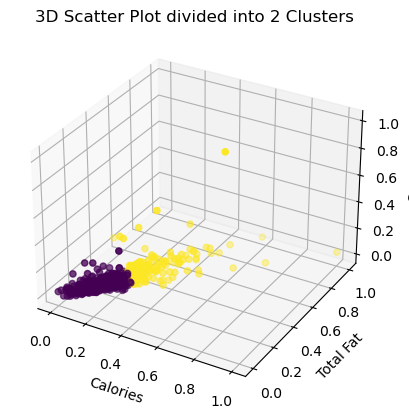

In [154]:
#Plotting the clusters on a 3D Scatter map to showcase how they are divided.
x_value = features_dataset['calories']
y_value = features_dataset['total_fat']
z_value = features_dataset['sugar']

#Creating the figure object.
fig = plt.figure()

#Setting the graph to 3D.
ax = fig.add_subplot(projection='3d')

#Creating the scatter plot with the three values and setting the colors based on the result of the KMeans-2Clusters column.
ax.scatter(x_value, 
           y_value, 
           z_value,
           c = x['KMeans-2Clusters'])

#Adding labels to the graph.
plt.title("3D Scatter Plot divided into 2 Clusters"),
ax.set_xlabel('Calories')
ax.set_ylabel('Total Fat')
ax.set_zlabel('Sugar')

## 3 Clusters

### Creating the clusters
We will repeat the same steps for the K=3 as we did for K=2, except for the BCubed Recall and Precision.

In [155]:
#Applying KMeans clustering with 3 clusters.
km_cl3 = KMeans(n_clusters = 3, init='k-means++', n_init = 10)
km_cl3.fit(features_dataset)

#Add a new column named KMeans-3Clusters to X dataset that has the current label of the value.
x['KMeans-3Clusters'] = km_cl3.labels_

#Printing the X dataset with the new column.
x

,calories,total_fat,sugar,KMeans-2Clusters,Category_Num,KMeans-3Clusters
0,0.149378,0.049645,0.126437,0,0,1
1,0.340249,0.319149,0.206897,1,1,0
2,0.460581,0.475177,0.206897,1,1,2
3,0.302905,0.219858,0.206897,1,1,0
4,0.373444,0.319149,0.206897,1,1,0
...,...,...,...,...,...,...
510,0.315353,0.269504,0.091954,1,1,0
511,0.232365,0.205674,0.080460,0,0,0
512,0.315353,0.297872,0.080460,1,1,0
513,0.290456,0.248227,0.091954,1,1,0


### Evaluation

In [156]:
print('Evaluation of 4 clusters: \n')

#Printing the X,Y,Z Coordinates of the cluster centers.
print('Cluster centers: \n', km_cl3.cluster_centers_ , '\n')

#Printing the total within-cluster sum of squared error.
print('Intra-cluster variance: \n', km_cl3.inertia_, '\n')
 
#Printing the silhouette coefficient.
sc_cl3 = silhouette_score(features_dataset, km_cl3.labels_)
print('Silhouette Coefficient: \n', sc_cl3, '\n')

Evaluation of 4 clusters: 

Cluster centers: 
 [[0.27058971 0.24367791 0.10774411]
 [0.13182138 0.10356658 0.05776173]
 [0.47717842 0.50460993 0.14137931]] 

Intra-cluster variance: 
 6.623145356068244 

Silhouette Coefficient: 
 0.4343877592680268 



### Visualization

Text(0.5, 0, 'Sugar')

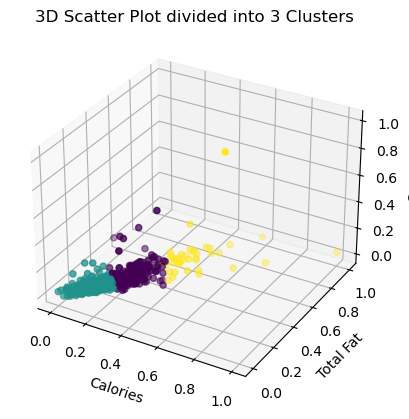

In [157]:
#Plotting the clusters on a 3D Scatter map to showcase how they are divided.
x_value = features_dataset['calories']
y_value = features_dataset['total_fat']
z_value = features_dataset['sugar']

#Creating the figure object.
fig = plt.figure()

#Setting the graph to 3D.
ax = fig.add_subplot(projection='3d')

#Creating the scatter plot with the three values and setting the colors based on the result of the KMeans-3Clustersz column.
ax.scatter(x_value, 
           y_value, 
           z_value,
           c = x['KMeans-3Clusters'])

#Adding labels to the graph.
plt.title("3D Scatter Plot divided into 3 Clusters"),
ax.set_xlabel('Calories')
ax.set_ylabel('Total Fat')
ax.set_zlabel('Sugar')

## 4 Clusters

### Creating the clusters
We will repeat the same steps for the K=4 as we did for K=3.

In [158]:
#Applying KMeans clustering with 4 clusters.
km_cl4 = KMeans(n_clusters = 4, init='k-means++', n_init = 10)
km_cl4.fit(features_dataset)

#Adding a column named KMeans-4Clusters to X dataset.
x['KMeans-4Clusters'] = km_cl4.labels_

#Printing the X dataset with the new column.
x

,calories,total_fat,sugar,KMeans-2Clusters,Category_Num,KMeans-3Clusters,KMeans-4Clusters
0,0.149378,0.049645,0.126437,0,0,1,3
1,0.340249,0.319149,0.206897,1,1,0,2
2,0.460581,0.475177,0.206897,1,1,2,0
3,0.302905,0.219858,0.206897,1,1,0,2
4,0.373444,0.319149,0.206897,1,1,0,2
...,...,...,...,...,...,...,...
510,0.315353,0.269504,0.091954,1,1,0,2
511,0.232365,0.205674,0.080460,0,0,0,1
512,0.315353,0.297872,0.080460,1,1,0,2
513,0.290456,0.248227,0.091954,1,1,0,2


### Evaluation

In [159]:
#Evaluating the model with 4 clusters.
print('Evaluation of 4 clusters: \n')

#Printing the X,Y,Z Coordinates of the cluster centers
print('Cluster centers: \n', km_cl4.cluster_centers_ , '\n')

#Printing the total within-cluster sum of squared error.
print('Intra-cluster variance: \n', km_cl4.inertia_, '\n')
 
#Printing the silhouette coefficient.
sc_cl4 = silhouette_score(features_dataset, km_cl4.labels_)
print('Silhouette Coefficient: \n', sc_cl4, '\n')

Evaluation of 4 clusters: 

Cluster centers: 
 [[0.50060233 0.54060856 0.14905451]
 [0.20629285 0.17100922 0.07769377]
 [0.30891765 0.28699363 0.13062537]
 [0.10408215 0.08110464 0.04706864]] 

Intra-cluster variance: 
 5.397969074851579 

Silhouette Coefficient: 
 0.35295767442252435 



### Visualization

Text(0.5, 0, 'Sugar')

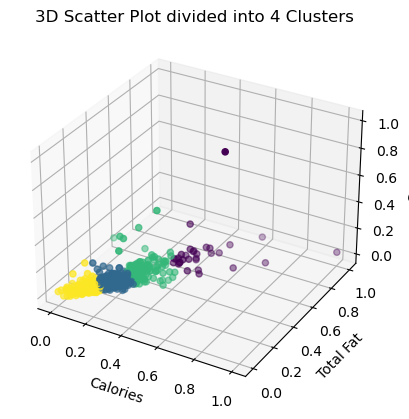

In [160]:
#Plotting the clusters on a 3D Scatter plot to showcase how they are divided.
x_value = features_dataset['calories']
y_value = features_dataset['total_fat']
z_value = features_dataset['sugar']

#Creating the figure object.
fig = plt.figure()

#Setting the graph to 3D.
ax = fig.add_subplot(projection='3d')

#Creating the scatter plot with the three values and setting the colors based on the result of the KMeans-4Clusters column.
ax.scatter(x_value, 
           y_value, 
           z_value,
           c = x['KMeans-4Clusters'])

#Adding labels to the graph.
plt.title("3D Scatter Plot divided into 4 Clusters"),
ax.set_xlabel('Calories')
ax.set_ylabel('Total Fat')
ax.set_zlabel('Sugar')

## Comparing the three different K values
Finally after creating and evaluating the three different sizes of K, we will now compare between them and determine the best size between the three. We will use the values of the silhouette coefficient to compare and determine the best size.

### Silhouette Coefficient
The silhouette coefficient is a metric used to measure the quality of a clustering technique. A good silhouette coefficient values means that the data points are very compact within the cluster they belong to and far away from the other clusters. The values range from -1 to 1.

The Silhouette Coefficient follows the equation <b>(y-x)/max(x,y)</b>; where x is the average distance between each point within a cluster and y is the average distance between all clusters. The optimal K value is one maximizes the average silhouette coefficient. The higher the silhouette coefficient, the better.


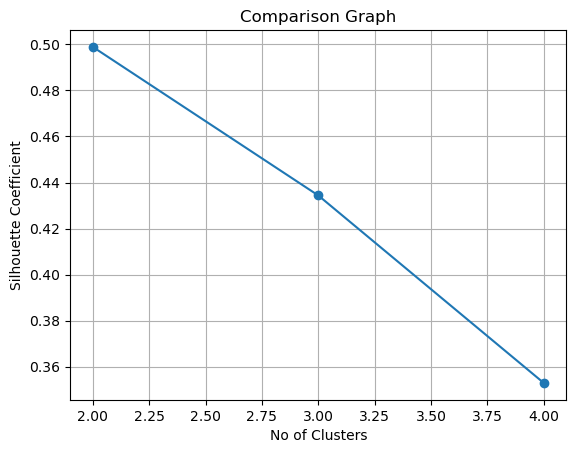

In [161]:
#Creating an array with the values of K.
k_values = [2,3,4]

#Creating an array with the values of the silhouette coefficient for each value of K respectively.
sc_values = [sc_cl2, sc_cl3, sc_cl4]

#Plotting the graph.
plt.title("Comparison Graph")
plt.xlabel('No of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.plot(k_values,sc_values, 'o-')

## Evaluation Conclusion
Based on the previous analysis, we can see that the optimal number of clusters that was determined by the silhouette coefficient was 2, as it had the highest value between all three. Therefore, the optimal K value for our dataset is 2.